In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Загрузка двух таблиц

In [2]:
df_title = pd.read_excel('rbk_base.xlsx')

In [3]:
df_title.head()

,ID публикации,Заголовок материала,URL
0,5bf52faf9a79477da426e81b,Как обанкротиться подешевле: прагматичные наст...,https://pro.rbc.ru/news/5bf52faf9a79477da426e81b
1,5c04ee439a7947b3fe48fe55,Имитация тунца: как искусственная рыба вытесня...,https://pro.rbc.ru/news/5c04ee439a7947b3fe48fe55
2,5c04f06c9a7947b48d48fe60,Сколько россияне тратят на путешествия,https://pro.rbc.ru/news/5c04f06c9a7947b48d48fe60
3,5c0695d69a79472e0096479e,Самые ходовые: какие специалисты в строительст...,https://pro.rbc.ru/news/5c0695d69a79472e0096479e
4,5c07891f9a794775e61affd1,Как запустить новый продукт: четыре обязательн...,https://pro.rbc.ru/news/5c07891f9a794775e61affd1


In [4]:
df_views = pd.read_excel('rbk_views.xlsx')

In [5]:
df_views.head()

,Адрес страницы,Просмотры
0,https://pro.rbc.ru/news/5c4af9ed9a7947bd94fe0cc9,2849
1,http://pro.rbc.ru/news/5c61b2d39a794798b96fab0c,2845
2,https://pro.rbc.ru/news/5c6195799a79478b57ba6cf3,2819
3,https://pro.rbc.ru//news/5c63fbff9a7947481bf4ce1b,2736
4,https://pro.rbc.ru/news/5c46d39b9a7947fc20fbcce6,2704


Для удобства переименую столбцы

In [6]:
df_title.rename(columns={'ID публикации':'id',
                        'Заголовок материала':'title',
                        'URL':'url'}, inplace=True)

df_views.rename(columns={'Адрес страницы':'url',
                        'Просмотры':'views_count'}, inplace=True)

Для таблицы с просмотрами найду все ссылки содержащие: test.pro, test.v2.pro, feature-rbcnews, /preview/, staging.pro, staging.v2.pro

In [7]:
bad_url = df_views[df_views['url'].str.contains('test.pro|test.v2.pro|feature-rbcnews|/preview/|staging.pro|staging.v2.pro')]['url']

In [8]:
bad_url

181     https://test.v2.pro.rbc.ru/news/5c540cc3308a9f...
299                              https://test.pro.rbc.ru/
357     https://staging.pro.rbc.ru/news/5c6579039a7947...
365     https://test.v2.pro.rbc.ru/news/5b28f5269a7947...
369     https://pro.rbc.ru/preview/5c4b11389a7947c69c5...
                              ...                        
2379    https://staging.pro.rbc.ru/news/5c6454df9a7947...
2418    http://feature-rbcnews-4453-pro-2-banners-chan...
2502    https://pro.rbc.ru/preview/5c653fd29a794725e80...
2634    https://staging.pro.rbc.ru/news/5c6585789a7947...
2669    https://pro.rbc.ru/preview/5c5c03099a7947a0aad...
Name: url, Length: 231, dtype: object

Теперь исключу из таблицы с просмотрами эти ссылки

In [9]:
df_views_new = df_views[~df_views['url'].isin(bad_url)]

In [10]:
df_views_new

,url,views_count
0,https://pro.rbc.ru/news/5c4af9ed9a7947bd94fe0cc9,2849
1,http://pro.rbc.ru/news/5c61b2d39a794798b96fab0c,2845
2,https://pro.rbc.ru/news/5c6195799a79478b57ba6cf3,2819
3,https://pro.rbc.ru//news/5c63fbff9a7947481bf4ce1b,2736
4,https://pro.rbc.ru/news/5c46d39b9a7947fc20fbcce6,2704
...,...,...
2691,https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b,1
2692,https://pro.rbc.ru/news/5c6297279a7947d83339d513,1
2693,https://pro.rbc.ru/news/5c62c45c9a7947eaedb915e4,1
2694,https://pro.rbc.ru/news/5c643a319a794760bbe62974,1


Сделаю самопроверку (проверю равно ли количество ссылок у изначальной таблицы с вычетом количества нежелательных ссылок и количество ссылок у новой таблицы с уже исключенными ссылками)

In [11]:
df_views.shape[0] - bad_url.shape[0] == df_views_new.shape[0]

True

In [12]:
concated = pd.concat([df_title, df_views_new])

In [13]:
concated.shape

(2919, 4)

Для случайного id посмотрю все его ссылки

In [14]:
df_views_new[df_views_new['url'].str.contains('5c63fbff9a7947481bf4ce1b')]

,url,views_count
3,https://pro.rbc.ru//news/5c63fbff9a7947481bf4ce1b,2736
40,https://pro.rbc.ru//news/5c63fbff9a7947481bf4ce1b,1425
84,https://pro.rbc.ru//news/5c63fbff9a7947481bf4ce1b,1106
119,https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b,817
239,https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b,214
326,https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b,128
362,https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b,97
428,https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b,81
477,https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b,72
482,https://pro.rbc.ru//news/5c63fbff9a7947481bf4ce1b,71


Можно заметить, что ссылки для одного поста различаются, проверю это

In [15]:
'https://pro.rbc.ru//news/5c63fbff9a7947481bf4ce1b' == 'https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b'

False

In [16]:
df_title[df_title['id']=='5c63fbff9a7947481bf4ce1b']

,id,title,url
438,5c63fbff9a7947481bf4ce1b,Кедры решают все: как вывести косметику на аме...,https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b


In [17]:
concated[concated['url']=='https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b']

,id,title,url,views_count
438,5c63fbff9a7947481bf4ce1b,Кедры решают все: как вывести косметику на аме...,https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b,NaN
119,NaN,NaN,https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b,817.0
239,NaN,NaN,https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b,214.0
326,NaN,NaN,https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b,128.0
362,NaN,NaN,https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b,97.0
428,NaN,NaN,https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b,81.0
477,NaN,NaN,https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b,72.0
491,NaN,NaN,https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b,70.0
711,NaN,NaN,https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b,30.0
893,NaN,NaN,https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b,25.0


In [18]:
df_views_new[df_views_new['url'].str.contains('5c63fbff9a7947481bf4ce1b')]

,url,views_count
3,https://pro.rbc.ru//news/5c63fbff9a7947481bf4ce1b,2736
40,https://pro.rbc.ru//news/5c63fbff9a7947481bf4ce1b,1425
84,https://pro.rbc.ru//news/5c63fbff9a7947481bf4ce1b,1106
119,https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b,817
239,https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b,214
326,https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b,128
362,https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b,97
428,https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b,81
477,https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b,72
482,https://pro.rbc.ru//news/5c63fbff9a7947481bf4ce1b,71


Да, действительно. Ситуация складывается такая: для публикации с уникальным id существует несколько ссылок, по которым переходили люди

Теперь для этого id публикации изменю все ссылки, которые принадлежат этой публикации на одну 'правильную' ссылку, в качестве которой я буду брать ссылку, которая указана в таблице с названием

Список всех ссылок для поста с выбранным id

In [19]:
df_views_new[df_views_new['url'].str.contains('5c63fbff9a7947481bf4ce1b')]['url'].tolist()

['https://pro.rbc.ru//news/5c63fbff9a7947481bf4ce1b',
 'https://pro.rbc.ru//news/5c63fbff9a7947481bf4ce1b',
 'https://pro.rbc.ru//news/5c63fbff9a7947481bf4ce1b',
 'https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b',
 'https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b',
 'https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b',
 'https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b',
 'https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b',
 'https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b',
 'https://pro.rbc.ru//news/5c63fbff9a7947481bf4ce1b',
 'https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b',
 'https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b',
 'http://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b',
 'https://pro.rbc.ru//news/5c63fbff9a7947481bf4ce1b',
 'https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b',
 'https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b',
 'https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b',
 'https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b',
 'https://pro.rbc.ru/news/5c63fbff9a794748

Вычислю количество этих ссылок для того, чтобы потом размножить 'правильную' ссылку, чтобы сработала замена 

In [20]:
len_url = len(df_views_new[df_views_new['url'].str.contains('5c63fbff9a7947481bf4ce1b')]['url'].tolist())

In [21]:
len_url

39

In [22]:
df_title[df_title['id']=='5c63fbff9a7947481bf4ce1b']['url'].tolist()*len_url

['https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b',
 'https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b',
 'https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b',
 'https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b',
 'https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b',
 'https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b',
 'https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b',
 'https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b',
 'https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b',
 'https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b',
 'https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b',
 'https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b',
 'https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b',
 'https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b',
 'https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b',
 'https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b',
 'https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b',
 'https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b',
 'https://pro.rbc.ru/news/5c63fbff9a7947481bf4

Теперь заменю все ссылки на 'правильную'

In [23]:
right_url1 = df_views_new['url'].replace(df_views_new[df_views_new['url'].str.contains('5c63fbff9a7947481bf4ce1b')]['url'].tolist(), 
                           df_title[df_title['id']=='5c63fbff9a7947481bf4ce1b']['url'].tolist()*len_url)

По индексам проверю правильно ли получилась замена

In [24]:
right_url1[right_url1=='https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b']

3       https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b
40      https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b
84      https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b
119     https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b
239     https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b
326     https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b
362     https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b
428     https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b
477     https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b
482     https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b
491     https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b
711     https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b
808     https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b
836     https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b
893     https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b
935     https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b
937     https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b
1018    https://pro.rbc.ru/news

Правильно. Теперь проверю через индекс

In [25]:
df_title['id'].tolist()[438]

'5c63fbff9a7947481bf4ce1b'

In [26]:
df_views_new[df_views_new['url'].str.contains(df_title['id'].tolist()[438])]['url'].tolist()

['https://pro.rbc.ru//news/5c63fbff9a7947481bf4ce1b',
 'https://pro.rbc.ru//news/5c63fbff9a7947481bf4ce1b',
 'https://pro.rbc.ru//news/5c63fbff9a7947481bf4ce1b',
 'https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b',
 'https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b',
 'https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b',
 'https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b',
 'https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b',
 'https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b',
 'https://pro.rbc.ru//news/5c63fbff9a7947481bf4ce1b',
 'https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b',
 'https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b',
 'http://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b',
 'https://pro.rbc.ru//news/5c63fbff9a7947481bf4ce1b',
 'https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b',
 'https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b',
 'https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b',
 'https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b',
 'https://pro.rbc.ru/news/5c63fbff9a794748

In [27]:
df_title[df_title['id']==df_title['id'].tolist()[438]]

,id,title,url
438,5c63fbff9a7947481bf4ce1b,Кедры решают все: как вывести косметику на аме...,https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b


In [28]:
df_views_new[df_views_new['url'].str.contains(df_title['id'].tolist()[438])]

,url,views_count
3,https://pro.rbc.ru//news/5c63fbff9a7947481bf4ce1b,2736
40,https://pro.rbc.ru//news/5c63fbff9a7947481bf4ce1b,1425
84,https://pro.rbc.ru//news/5c63fbff9a7947481bf4ce1b,1106
119,https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b,817
239,https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b,214
326,https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b,128
362,https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b,97
428,https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b,81
477,https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b,72
482,https://pro.rbc.ru//news/5c63fbff9a7947481bf4ce1b,71


Сделаю проверку для другого id публикации

In [29]:
df_title['id'].tolist()[0]

'5bf52faf9a79477da426e81b'

In [30]:
df_views_new[df_views_new['url'].str.contains(df_title['id'].tolist()[0])]['url'].tolist()

[]

In [31]:
df_title[df_title['id']==df_title['id'].tolist()[0]]

,id,title,url
0,5bf52faf9a79477da426e81b,Как обанкротиться подешевле: прагматичные наст...,https://pro.rbc.ru/news/5bf52faf9a79477da426e81b


In [32]:
df_views_new[df_views_new['url'].str.contains(df_title['id'].tolist()[0])]

,url,views_count


Проверю для последнего id публикации

In [33]:
df_title['id'].tolist()[453]

'5c668b389a79479514089233'

In [34]:
df_views_new[df_views_new['url'].str.contains(df_title['id'].tolist()[453])]['url'].tolist()

['https://pro.rbc.ru/news/5c668b389a79479514089233',
 'https://pro.rbc.ru/news/5c668b389a79479514089233',
 'https://pro.rbc.ru/rbcfreenews/5c668b389a79479514089233',
 'http://pro.rbc.ru/news/5c668b389a79479514089233',
 'https://pro.rbc.ru/news/5c668b389a79479514089233',
 'http://pro.rbc.ru/news/5c668b389a79479514089233',
 'https://pro.rbc.ru/news/5c668b389a79479514089233',
 'https://pro.rbc.ru//news/5c668b389a79479514089233',
 'https://pro.rbc.ru/news/5c668b389a79479514089233',
 'https://pro.rbc.ru/news/5c668b389a79479514089233',
 'https://pro.rbc.ru/news/5c668b389a79479514089233',
 'https://pro.rbc.ru/news/5c668b389a79479514089233',
 'https://pro.rbc.ru/news/5c668b389a79479514089233',
 'https://pro.rbc.ru/news/5c668b389a79479514089233',
 'https://pro.rbc.ru/news/5c668b389a79479514089233',
 'https://pro.rbc.ru/news/5c668b389a79479514089233',
 'https://pro.rbc.ru/news/5c668b389a79479514089233',
 'https://pro.rbc.ru/news/5c668b389a79479514089233',
 'https://pro.rbc.ru/news/5c668b389a7947

In [35]:
df_title[df_title['id']==df_title['id'].tolist()[453]]

,id,title,url
453,5c668b389a79479514089233,Мировой сектор товаров класса люкс восстановил...,https://pro.rbc.ru/news/5c668b389a79479514089233


In [36]:
df_views_new[df_views_new['url'].str.contains(df_title['id'].tolist()[453])]

,url,views_count
43,https://pro.rbc.ru/news/5c668b389a79479514089233,1393
53,https://pro.rbc.ru/news/5c668b389a79479514089233,1349
117,https://pro.rbc.ru/rbcfreenews/5c668b389a79479...,833
209,http://pro.rbc.ru/news/5c668b389a79479514089233,251
230,https://pro.rbc.ru/news/5c668b389a79479514089233,224
253,http://pro.rbc.ru/news/5c668b389a79479514089233,201
259,https://pro.rbc.ru/news/5c668b389a79479514089233,189
336,https://pro.rbc.ru//news/5c668b389a79479514089233,115
425,https://pro.rbc.ru/news/5c668b389a79479514089233,81
526,https://pro.rbc.ru/news/5c668b389a79479514089233,64


Как видно, может быть такая ситуация, когда для публикации есть уникальный id, но по ней нет ни одной ссылки, по которой переходили люди

Создам список с общим количеством ссылок, по которым переходили люди, для каждой публикации с уникальным id

In [37]:
lens=[]

for i in range(len(df_title['id'].tolist())):
    lens.append(len(df_views_new[df_views_new['url'].str.contains(df_title['id'].tolist()[i])]['url'].tolist()))

In [38]:
lens

[0,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 0,
 3,
 2,
 0,
 1,
 3,
 2,
 1,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 1,
 0,
 3,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 3,
 0,
 0,
 0,
 2,
 4,
 1,
 2,
 3,
 1,
 1,
 2,
 1,
 1,
 0,
 2,
 1,
 1,
 0,
 2,
 0,
 2,
 1,
 2,
 0,
 0,
 1,
 0,
 1,
 2,
 0,
 1,
 3,
 2,
 0,
 1,
 0,
 1,
 1,
 2,
 0,
 12,
 1,
 2,
 1,
 0,
 2,
 1,
 2,
 1,
 2,
 0,
 2,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 3,
 2,
 2,
 2,
 0,
 1,
 2,
 1,
 0,
 1,
 4,
 3,
 0,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 0,
 1,
 1,
 2,
 2,
 2,
 3,
 4,
 1,
 2,
 4,
 2,
 4,
 2,
 4,
 3,
 4,
 1,
 2,
 2,
 4,
 3,
 3,
 3,
 2,
 3,
 1,
 3,
 2,
 3,
 2,
 2,
 2,
 1,
 1,
 2,
 0,
 2,
 3,
 4,
 0,
 0,
 5,
 1,
 2,
 2,
 3,
 1,
 0,
 2,
 1,
 4,
 0,
 0,
 1,
 3,
 2,
 3,
 3,
 0,
 2,
 2,
 3,
 2,
 3,
 1,
 2,
 0,
 3,
 2,
 4,
 1,
 2,
 2,
 1,
 1,
 4,
 2,
 4,
 1,
 3,
 1,
 1,
 2,
 2,
 1,
 0,
 1,
 2,
 3,
 3,
 3,
 0,
 1,
 0,
 4,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 3,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 3,
 4,
 3,
 2,
 2,
 4,
 3,
 0,
 2,

Самопроверка правильности создания списка

In [39]:
lens[453] == len(df_views_new[df_views_new['url'].str.contains(df_title['id'].tolist()[453])]['url'].tolist())

True

Визуализирую полученные количества

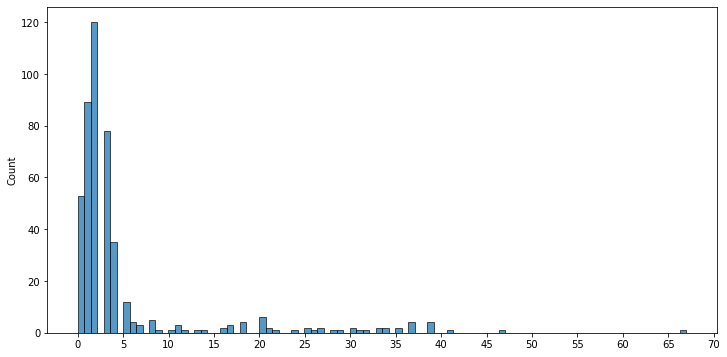

In [40]:
fig, ax = plt.subplots(figsize=(12,6))

ax = sns.histplot(data=lens)
ax = plt.xticks(np.arange(0,71,5))

Как видно из графика большинство количеств ссылок сконцентрированно между 0 и 5, к тому же есть даже значение превышающее 65

Теперь проверю замену ссылок через индексы, сделаю это для последнего элемента с индексом 453

In [41]:
right_url2 = df_views_new['url'].replace(df_views_new[df_views_new['url'].str.contains(df_title['id'].tolist()[453])]['url'].tolist(), 
                           df_title[df_title['id']==df_title['id'].tolist()[453]]['url'].tolist()*lens[453])

In [42]:
right_url2[right_url2=='https://pro.rbc.ru/news/5c668b389a79479514089233']

43      https://pro.rbc.ru/news/5c668b389a79479514089233
53      https://pro.rbc.ru/news/5c668b389a79479514089233
117     https://pro.rbc.ru/news/5c668b389a79479514089233
209     https://pro.rbc.ru/news/5c668b389a79479514089233
230     https://pro.rbc.ru/news/5c668b389a79479514089233
253     https://pro.rbc.ru/news/5c668b389a79479514089233
259     https://pro.rbc.ru/news/5c668b389a79479514089233
336     https://pro.rbc.ru/news/5c668b389a79479514089233
425     https://pro.rbc.ru/news/5c668b389a79479514089233
526     https://pro.rbc.ru/news/5c668b389a79479514089233
539     https://pro.rbc.ru/news/5c668b389a79479514089233
682     https://pro.rbc.ru/news/5c668b389a79479514089233
876     https://pro.rbc.ru/news/5c668b389a79479514089233
896     https://pro.rbc.ru/news/5c668b389a79479514089233
1173    https://pro.rbc.ru/news/5c668b389a79479514089233
1246    https://pro.rbc.ru/news/5c668b389a79479514089233
1268    https://pro.rbc.ru/news/5c668b389a79479514089233
1358    https://pro.rbc.ru/news

Запись через индексы правильна

Теперь наконец сделаю это для всех уникальных id

In [43]:
for j in range(len(df_title['id'])-1):
    df_views_new['url'].replace(df_views_new[df_views_new['url'].str.contains(df_title['id'].tolist()[j])]['url'].tolist(), 
                        df_title[df_title['id']==df_title['id'].tolist()[j]]['url'].tolist()*lens[j], inplace=True)

C:\Users\ilyap\AppData\Local\Temp\ipykernel_25108\4100103737.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_views_new['url'].replace(df_views_new[df_views_new['url'].str.contains(df_title['id'].tolist()[j])]['url'].tolist(),


Теперь просуммирую количество просмотров по каждой уникальной ссылке

In [44]:
df_views_new_final = df_views_new.groupby('url', as_index=False)['views_count'].sum()

In [45]:
df_views_new_final

,url,views_count
0,http://pro.rbc.ru/news/5ae1aad29a794706d16a22c2,7
1,http://pro.rbc.ru/news/5b14e8cc9a7947067251ea38,9
2,http://pro.rbc.ru/news/5b2259e59a7947553b31dc52,2
3,http://pro.rbc.ru/news/5b8e6c709a7947cf89e79de5,7
4,http://pro.rbc.ru/news/5bb1e4bc9a794705222af612,3
...,...,...
567,https://pro.rbc.ru/rbcfreenews/5bf547be9a79470...,53
568,https://pro.rbc.ru/rbcfreenews/5c00ec679a79476...,74
569,https://pro.rbc.ru/rbcfreenews/5c0922149a79476...,10
570,https://pro.rbc.ru/rbcfreenews/5c52b5c49a79473...,280


In [46]:
df_title.shape[0]

454

Можно заметить, что количество ссылок у этой таблицы (572) различается с количеством ссылок в таблице с уникальными id (454), это может быть связано с тем, что для ссылки, по которой переходили люди нет уникального id, и по таблице узнать название невозможно

Например, из первой ссылки, я скопирую то, что должно быть на месте id публикации, и проверю есть ли в таблице с названиями такой id

In [47]:
df_title[df_title['id']=='5bb1e4bc9a794705222af612']

,id,title,url


Такого id нет, следовательно мои доводы подтвердились

Теперь соединю две таблицы

In [48]:
df_final = df_title.merge(df_views_new_final, on='url')

In [49]:
df_final

,id,title,url,views_count
0,5c04ee439a7947b3fe48fe55,Имитация тунца: как искусственная рыба вытесня...,https://pro.rbc.ru/news/5c04ee439a7947b3fe48fe55,28
1,5c04f06c9a7947b48d48fe60,Сколько россияне тратят на путешествия,https://pro.rbc.ru/news/5c04f06c9a7947b48d48fe60,6
2,5c0695d69a79472e0096479e,Самые ходовые: какие специалисты в строительст...,https://pro.rbc.ru/news/5c0695d69a79472e0096479e,29
3,5c07891f9a794775e61affd1,Как запустить новый продукт: четыре обязательн...,https://pro.rbc.ru/news/5c07891f9a794775e61affd1,283
4,5c07cc619a79470aafcb889b,Что закладывает работодатель на 2019 год: перв...,https://pro.rbc.ru/news/5c07cc619a79470aafcb889b,41
...,...,...,...,...
396,5c6585789a7947493d396dc7,Как потребителей заставили платить больше: чет...,https://pro.rbc.ru/news/5c6585789a7947493d396dc7,6492
397,5c658e479a79474d32847233,"Глава BlaBlaCar — РБК: «Мы оказывали услуги, н...",https://pro.rbc.ru/news/5c658e479a79474d32847233,11483
398,5c65950d9a79474f82f780d7,«Алые паруса» сворачиваются: почему владельцы ...,https://pro.rbc.ru/news/5c65950d9a79474f82f780d7,11282
399,5c666dd69a794787c020c0bf,Золушки молла: где маленьким сервисам найти пр...,https://pro.rbc.ru/news/5c666dd69a794787c020c0bf,6170


Количество публикаций (401) получилось меньше, чем изначально было в таблице с названиями публикаций и уникальными id (454). Это связано с тем, что на некоторые публикации нет информации он просмотрах, либо на этой публикации просто не было просмотров

Визуализирую наиболее часто встречающееся количество просмотров

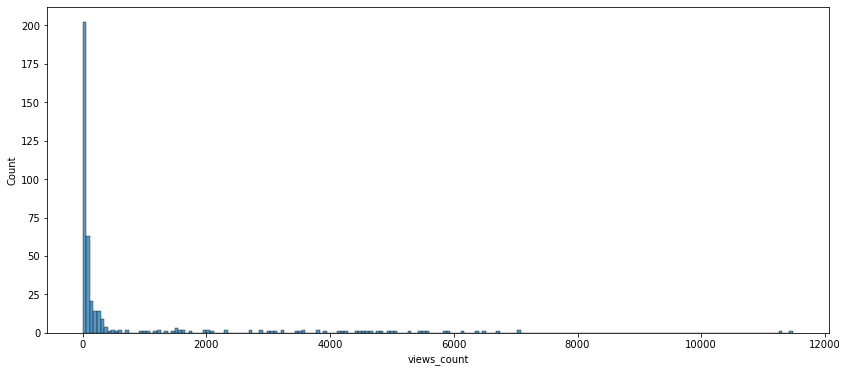

In [50]:
fig, ax = plt.subplots(figsize=(14,6))

ax = sns.histplot(data=df_final, x='views_count')

Из графика видно, что есть две публикации, которые сильно превосходят по просмотрам остальные. Посмотрю что это за публикации

In [51]:
df_final[df_final['views_count']>10000]

,id,title,url,views_count
397,5c658e479a79474d32847233,"Глава BlaBlaCar — РБК: «Мы оказывали услуги, н...",https://pro.rbc.ru/news/5c658e479a79474d32847233,11483
398,5c65950d9a79474f82f780d7,«Алые паруса» сворачиваются: почему владельцы ...,https://pro.rbc.ru/news/5c65950d9a79474f82f780d7,11282


Проверю среднее количество просмотров

In [52]:
df_final['views_count'].mean()

681.9700748129676

Проверю сколько публикаций, просмотры которых превышают среднее количество просмотров 

In [53]:
df_final[df_final['views_count']>df_final['views_count'].mean()].shape[0]

68

Сколько публикаций, просмотры которых меньше среднего количиства

In [54]:
df_final[df_final['views_count']<df_final['views_count'].mean()].shape[0]

333

Есть подозрение, что среднее от количество просмотров стягивается в пользу больших значений из-за слишком больших значений. Проверю медиану количества просмотров

In [55]:
df_final['views_count'].median()

57.0

Действительно, медиана меньше среднего более чем в 10 раз

Отсортирую публикации по количеству просмотров в порядке убывания и выберу первые 20

In [56]:
df_final_top20 = df_final.sort_values(by='views_count', ascending=False, ignore_index=True)[:20]

Визуально отображу полученные значения

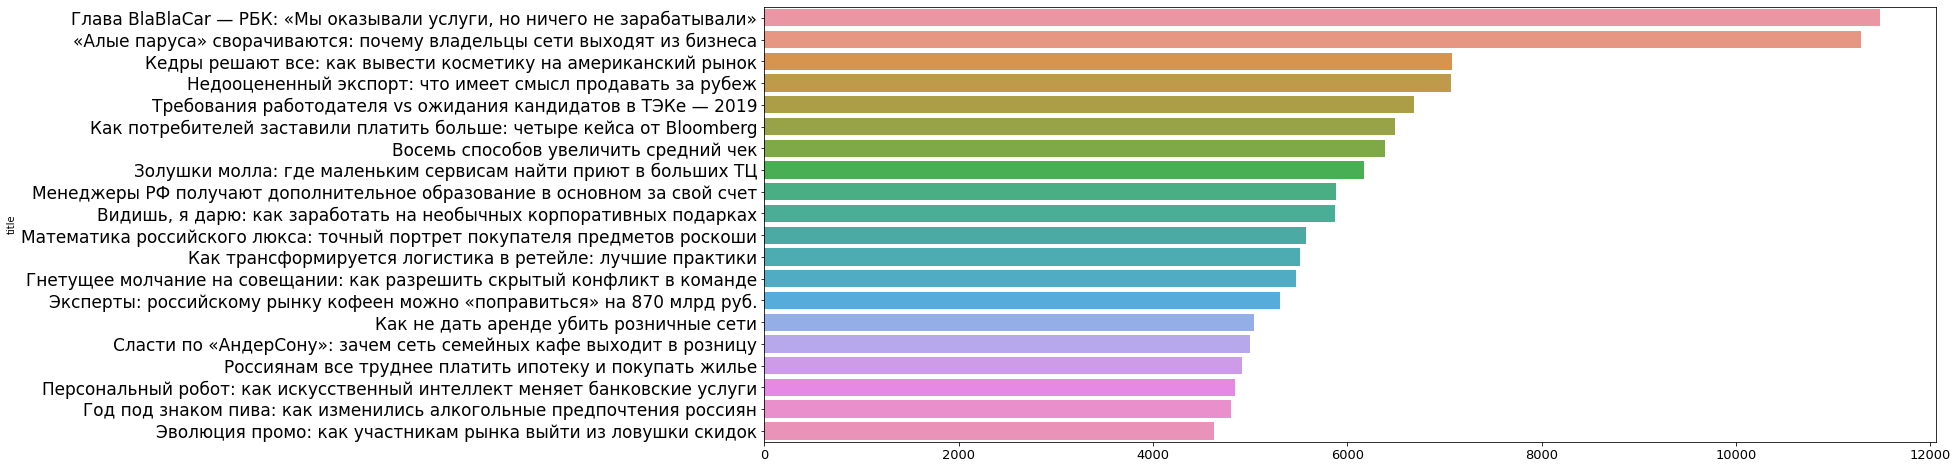

In [57]:
fig, ax = plt.subplots(figsize=(21,8))

ax = sns.barplot(data=df_final_top20, x='views_count', y='title', orient='h')
ax = plt.xticks(size=13)
ax = plt.yticks(size=17)
ax = plt.xlabel('')

Сохраню таблицу в экселевский файл с топ 20 материалов для последующего добавления гиперссылок

In [58]:
# df_final_top20.to_excel('df_final_top20.xlsx')

Сохраню всю таблицу для последующей визуализации

In [59]:
# df_final.to_excel('df_final.xlsx')